In [1]:
import numpy as np            # for mathematical computations
import nltk                   # for downloading the Reuters corpus
from datetime import datetime # for tracking training time
import sys                    # to exit in case of non-terminating errors
import pickle                 # to store word embeddings to an external file

In [2]:
nltk.download('reuters')
from nltk.corpus import reuters

"""
for preprocessing the text
"""
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

print(stopwords.words('english'))

"""
for plotting the visualizations
"""
import matplotlib.pyplot as plt

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'a

In [3]:
reuters.categories(['training/9865', 'training/9880'])

['barley', 'corn', 'grain', 'money-fx', 'wheat']

In [4]:
len(reuters.words()), len(reuters.categories()), len(reuters.fileids())

(1720901, 90, 10788)

In [5]:
# populating arrays with the list of all categories and their respective file counts
categories = []
file_count = []

# calculating the number of documents in each category
for i in reuters.categories():
  # print("$ There are {} documents included in topic \"{}\"".format(len(reuters.fileids(i)), i))
  file_count.append(len(reuters.fileids(i)))
  categories.append(i)

counts=list(zip(file_count,categories))
counts.sort(reverse=True)

for i in range (15):
  print(counts[i])

(3964, 'earn')
(2369, 'acq')
(717, 'money-fx')
(582, 'grain')
(578, 'crude')
(485, 'trade')
(478, 'interest')
(286, 'ship')
(283, 'wheat')
(237, 'corn')
(175, 'dlr')
(174, 'money-supply')
(171, 'oilseed')
(162, 'sugar')
(139, 'coffee')


In [6]:
len(reuters.words(reuters.fileids(['coffee'])))

36710

In [7]:
top_cat = []
top_cat.append(counts[14])
top_cat = [v for _,v in top_cat]

In [8]:
# select fileid with the category filter
doc_list = np.array(reuters.fileids(top_cat))
# doc_list = doc_list[doc_list != 'training/3267']

test_doc = doc_list[['test' in x for x in doc_list]]
print(">>> test_doc is created with following document names: {} ...".format(test_doc[0:5]))
train_doc = doc_list[['training' in x for x in doc_list]]
print(">>> train_doc is created with following document names: {} ...".format(train_doc[0:5]))

test_corpus = [" ".join([t for t in reuters.words(test_doc[t])])
               for t in range(len(test_doc))]
print(">>> test_corpus is created, the first line is: {} ...".format(test_corpus[0][:100]))
train_corpus = [" ".join([t for t in reuters.words(train_doc[t])])
                for t in range(len(train_doc))]
print(">>> train_corpus is created, the first line is: {} ...".format(train_corpus[0][:100]))

>>> test_doc is created with following document names: ['test/14840' 'test/15198' 'test/15329' 'test/15357' 'test/15540'] ...
>>> train_doc is created with following document names: ['training/10014' 'training/10100' 'training/1026' 'training/10268'
 'training/1030'] ...
>>> test_corpus is created, the first line is: INDONESIAN COMMODITY EXCHANGE MAY EXPAND The Indonesian Commodity Exchange is likely to start tradin ...
>>> train_corpus is created, the first line is: COFFEE , SUGAR AND COCOA EXCHANGE NAMES CHAIRMAN The New York Coffee , Sugar and Cocoa Exchange ( CS ...


In [9]:
def preprocess(corpus):
  # cleans the text corpus by removing stopwords, converting all sentences to lowercase, removing all non-english characters and lemmatization
  Stopwords = set(stopwords.words("english"))
  clean_corpus = []
  word_mapping = {}
  index_mapping = {}
  vocab = set()
  i = 0

  for doc in corpus:
      doc = re.sub("[^A-Za-z]+", " ", doc)
      doc = word_tokenize(doc)
      doc = [d.lower() for d in doc]
      doc = [d for d in doc if d not in Stopwords]
      lemmatizer = WordNetLemmatizer()
      doc = [lemmatizer.lemmatize(d) for d in doc]
      for d in doc:
        if d not in vocab:
          vocab.add(d)
          word_mapping[d]=i
          index_mapping[i]=d
          i+=1
      clean_corpus.append(doc)
  
  clean_corpus = [" ".join(d) for d in clean_corpus]
  return clean_corpus, vocab, word_mapping, index_mapping


In [10]:
clean_train_corpus, train_vocab, train_word_mapping, train_index_mapping = preprocess(train_corpus)
clean_test_corpus, test_vocab, test_word_mapping, test_index_mapping = preprocess(test_corpus)

test_corpus[:10], clean_test_corpus[:10]

(['INDONESIAN COMMODITY EXCHANGE MAY EXPAND The Indonesian Commodity Exchange is likely to start trading in at least one new commodity , and possibly two , during calendar 1987 , exchange chairman Paian Nainggolan said . He told Reuters in a telephone interview that trading in palm oil , sawn timber , pepper or tobacco was being considered . Trading in either crude palm oil ( CPO ) or refined palm oil may also be introduced . But he said the question was still being considered by Trade Minister Rachmat Saleh and no decision on when to go ahead had been made . The fledgling exchange currently trades coffee and rubber physicals on an open outcry system four days a week . " Several factors make us move cautiously ," Nainggolan said . " We want to move slowly and safely so that we do not make a mistake and undermine confidence in the exchange ." Physical rubber trading was launched in 1985 , with coffee added in January 1986 . Rubber contracts are traded FOB , up to five months forward . R

In [11]:
len(test_vocab), len(train_vocab)

(1094, 2812)

In [12]:
def generate_target_context_word_pairs(corpus, window_size):
    context_words = []
    target_word   = []
    for doc in corpus:
      words = doc.split()
      for index, word in enumerate(words):
        doc_length = len(words)
        # for index, word in enumerate(words):
        start = index - window_size
        end = index + window_size + 1
          
        context_words.append([words[i] for i in range(start, end) if 0 <= i < doc_length and i != index])
        target_word.append(word)
          
    return context_words, target_word

In [13]:
test_context, test_target = generate_target_context_word_pairs(clean_test_corpus, 2)
test_context[:10], test_target[:10], len(test_context)

([['commodity', 'exchange'],
  ['indonesian', 'exchange', 'may'],
  ['indonesian', 'commodity', 'may', 'expand'],
  ['commodity', 'exchange', 'expand', 'indonesian'],
  ['exchange', 'may', 'indonesian', 'commodity'],
  ['may', 'expand', 'commodity', 'exchange'],
  ['expand', 'indonesian', 'exchange', 'likely'],
  ['indonesian', 'commodity', 'likely', 'start'],
  ['commodity', 'exchange', 'start', 'trading'],
  ['exchange', 'likely', 'trading', 'least']],
 ['indonesian',
  'commodity',
  'exchange',
  'may',
  'expand',
  'indonesian',
  'commodity',
  'exchange',
  'likely',
  'start'],
 3032)

In [14]:
train_context, train_target = generate_target_context_word_pairs(clean_train_corpus, 2)
train_context[:10], train_target[:10], len(train_context)

([['sugar', 'cocoa'],
  ['coffee', 'cocoa', 'exchange'],
  ['coffee', 'sugar', 'exchange', 'name'],
  ['sugar', 'cocoa', 'name', 'chairman'],
  ['cocoa', 'exchange', 'chairman', 'new'],
  ['exchange', 'name', 'new', 'york'],
  ['name', 'chairman', 'york', 'coffee'],
  ['chairman', 'new', 'coffee', 'sugar'],
  ['new', 'york', 'sugar', 'cocoa'],
  ['york', 'coffee', 'cocoa', 'exchange']],
 ['coffee',
  'sugar',
  'cocoa',
  'exchange',
  'name',
  'chairman',
  'new',
  'york',
  'coffee',
  'sugar'],
 16098)

In [15]:
def normalize_rows(matrix):
  # Normalization function to normalize rows of a matrix
    return matrix/np.linalg.norm(matrix, ord=2, axis=1, keepdims=True)

In [16]:
vocabulary = test_vocab           # vocabulary of training corpus
vocab_size = len(test_vocab)      # size of vocabulary
embedding_size = 50               # required dimension of each word vector
window_size = 2                   # window size for context words around target word
learning_rate = 0.0001            # learning rate for training
word_index = test_word_mapping    # index mapping each word to a number
index_word = test_index_mapping   # index mapping each number to a word
W_hidden = np.random.uniform(-0.01, 0.01, (vocab_size, embedding_size)) # weight matrix for input layer ( n X |V| )
W_output = np.random.uniform(-0.01, 0.01, (embedding_size, vocab_size)) # weight matrix for hidden layer ( |V| X n )

final_vectors = {}
minval = 0.00001

print("Word vector size = %s"%embedding_size)
print("Vocabulary size = %s"%vocab_size)
print("Word Index dictionary = %s"%word_index)
print("hidden parameter matrix = %s"%W_hidden)
print("output parameter matrix = %s"%W_output)

Word vector size = 50
Vocabulary size = 1094
Word Index dictionary = {'indonesian': 0, 'commodity': 1, 'exchange': 2, 'may': 3, 'expand': 4, 'likely': 5, 'start': 6, 'trading': 7, 'least': 8, 'one': 9, 'new': 10, 'possibly': 11, 'two': 12, 'calendar': 13, 'chairman': 14, 'paian': 15, 'nainggolan': 16, 'said': 17, 'told': 18, 'reuters': 19, 'telephone': 20, 'interview': 21, 'palm': 22, 'oil': 23, 'sawn': 24, 'timber': 25, 'pepper': 26, 'tobacco': 27, 'considered': 28, 'either': 29, 'crude': 30, 'cpo': 31, 'refined': 32, 'also': 33, 'introduced': 34, 'question': 35, 'still': 36, 'trade': 37, 'minister': 38, 'rachmat': 39, 'saleh': 40, 'decision': 41, 'go': 42, 'ahead': 43, 'made': 44, 'fledgling': 45, 'currently': 46, 'coffee': 47, 'rubber': 48, 'physicals': 49, 'open': 50, 'outcry': 51, 'system': 52, 'four': 53, 'day': 54, 'week': 55, 'several': 56, 'factor': 57, 'make': 58, 'u': 59, 'move': 60, 'cautiously': 61, 'want': 62, 'slowly': 63, 'safely': 64, 'mistake': 65, 'undermine': 66, 'c

In [17]:
def one_hot_vector(n):
  # returns one-hot representation of a word from its index
  vec = np.zeros(vocab_size)
  vec[n] = 1
  return vec

In [18]:
def avg_context_vector(context_words):
  # returns average vector representation of all context words for a given target word
  avg_vector = np.zeros(vocab_size)

  for word in context_words:
    index = word_index[word]
    one_hot_encoding = one_hot_vector(index)
    avg_vector += one_hot_encoding

  avg_vector /= (2*window_size)
  return avg_vector

In [19]:
def get_matrix_hidden_layer(avg_vector=None):
  # given an average context vector, computes the product of avg_vector with W_hidden
  return np.dot(avg_vector, W_hidden)

In [ ]:
def get_matrix_output_layer(h=None):
  # given the hidden layer matrix, computes the product of h with W_output
  return np.dot(h, W_output)

In [ ]:
def softmax(vector):
    # applies softmax to a vector
    if vector.ndim >1:
      vector -= np.max(vector, axis=1).reshape(-1, 1)
      vector = np.divide(np.exp(vector), np.sum(np.exp(vector), axis=1).reshape(-1, 1) + minval)
    else:
      vector -= np.max(vector)
      vector = np.divide(np.exp(vector), np.sum(np.exp(vector)) + minval)

    #np.nan_to_num(vector)
    return vector

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [ ]:
def cross_entropy(y_hat, y):
  # computes cross entropy error given the prediction and true label
  
  loss = -y*np.log(y_hat + minval)
  return loss

In [ ]:
def obtain_gradients(pred, one_hot_target, h, avg_vector):
  # dW_output = dcost_dz0 * dzo_dW_hidden
  dcost_dzo = (pred - one_hot_target)
  dW_output = np.outer(h, dcost_dzo.T)
  
  # dW_hidden = dcost_dah * dah_dzh * dzh_dW_input
  dzo_dah = dW_output
  dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
  dah_dzh = h*(1-h)
  dzh_dW_input = avg_vector
  dW_hidden = np.outer(dzh_dW_input.T, dah_dzh * dcost_dah)
  
  return dW_output, dW_hidden 

In [ ]:
def SGD_optimizer(num_epochs, W_hidden, W_output):
  # using SGD to fit the matrices V and U
  costs = []
  begin_time = datetime.now()

  for k in range(1, num_epochs + 1):
    epoch_cost = 0

    if k%100==0 :
      print("Epoch #%d"%k)

    for i in range(len(test_context)):
      # compute the average vector using the context words
      avg_vector = avg_context_vector(test_context[i])

      # calculating hidden layer matrix 'h'
      z = get_matrix_hidden_layer(avg_vector)
      h = sigmoid(z)

      # calculating output layer matrix 'u'
      u = get_matrix_output_layer(h)

      # calculating softmax of the ouput 'u'
      pred = softmax(u)

      # get one-hot encoding of the target word
      index = word_index[test_target[i]]
      one_hot_target = one_hot_vector(index)

      # compute the error in production for current target word
      error = cross_entropy(pred, one_hot_target)
      epoch_cost += np.sum(error)

      # calculate gradients for parameters of both layers
      dW_output, dW_hidden = obtain_gradients(pred, one_hot_target, h, avg_vector)

      # update outer layer parameters
      W_output -= learning_rate*dW_output

      # update hidden layer parameters
      W_hidden -= learning_rate*dW_hidden

    costs.append(epoch_cost)    

    # storing final vectors and epoch_cost to a file
    for j,v in word_index.items():
      final_vectors[j] = (W_hidden[v,:] + W_output[:, v])/2
    
    if k%100 == 0:
      with open('/content/drive/My Drive/Colab Notebooks/test results/lr=0.0001/fw_epoch_TEST_'+str(k), 'wb') as handle1:
        pickle.dump(final_vectors, handle1, protocol=pickle.HIGHEST_PROTOCOL) 
      with open('/content/drive/My Drive/Colab Notebooks/test results/lr=0.0001/fw_error_TEST_'+str(k), 'wb') as handle2:
        pickle.dump(epoch_cost, handle2, protocol=pickle.HIGHEST_PROTOCOL)

    if k%100==0 :
      print('Epoch cost : %d'%epoch_cost)
    
  end_time = datetime.now()
  print('Total training time: {}'.format(end_time - begin_time))

  # Plotting each epoch's cost
  plt.plot(np.arange(num_epochs), costs)
  plt.xlabel('# of epochs')
  plt.ylabel('cost')
  plt.savefig('/content/drive/My Drive/Colab Notebooks/test results/lr=0.0001/epochs.png', bbox_inches='tight')

  # Also storing the weight matrices
  with open('/content/drive/My Drive/Colab Notebooks/test results/lr=0.0001/W_hidden', 'wb') as handle3:
    pickle.dump(W_hidden, handle3, protocol=pickle.HIGHEST_PROTOCOL)
  with open('/content/drive/My Drive/Colab Notebooks/test results/lr=0.0001/W_output', 'wb') as handle4:
    pickle.dump(W_output, handle4, protocol=pickle.HIGHEST_PROTOCOL)

Epoch #100
Epoch cost : 19393
Epoch #200
Epoch cost : 19170
Epoch #300
Epoch cost : 19097
Epoch #400
Epoch cost : 19066
Epoch #500
Epoch cost : 19052
Epoch #600
Epoch cost : 19047
Epoch #700
Epoch cost : 19045
Epoch #800
Epoch cost : 19046
Epoch #900
Epoch cost : 19048
Epoch #1000
Epoch cost : 19052
Total training time: 0:52:56.758797


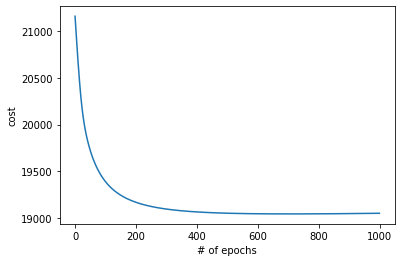

In [ ]:
SGD_optimizer(1000, W_hidden, W_output)

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
weights = []
with open('/content/drive/My Drive/Colab Notebooks/test results/lr=0.005/W_hidden', 'rb') as openfile:
  while True:
    try:
      weights.append(pickle.load(openfile, protocol=pickle.HIGHEST_PROTOCOL))
    except EOFError:
      break

In [ ]:
0
0
0
0
0
0

In [21]:
with open('/content/drive/My Drive/Colab Notebooks/test results/lr=0.0001/W_hidden', 'rb') as handle1:
  W_hidden = pickle.load(handle1)
with open('/content/drive/My Drive/Colab Notebooks/test results/lr=0.0001/W_output', 'rb') as handle2:
  W_output = pickle.load(handle2)

In [ ]:
def find_top_n_similar(word, n=5):
    arr  = {}
    vec_word = copy_final_vectors[word]
    norm_vec_word = np.linalg.norm(vec_word)
    for j,v in word_index.items():
        cos_sim = np.dot(copy_final_vectors[j], vec_word.T) / (np.linalg.norm(copy_final_vectors[j], axis=0) * norm_vec_word)
        arr[cos_sim] = j
    for i in sorted(arr, key=arr.get, reverse=True):
        if n <= 0:
            break
        print(arr[i], end =" , ")
        n  = n-1

In [ ]:
infile1 = open('/content/drive/My Drive/Colab Notebooks/test results/lr=0.0001/W_hidden', "rb")
W_hidden = pickle.load(infile1)
infile1.close()

infile2 = open('/content/drive/My Drive/Colab Notebooks/test results/lr=0.0001/W_output', "rb")
W_output = pickle.load(infile2)
infile2.close()

W_hidden, W_output

(array([[-0.01810765, -0.02537467, -0.01167695, ..., -0.01840843,
         -0.02341648, -0.02313899],
        [-0.03913591, -0.02673321, -0.04285323, ..., -0.03495394,
         -0.0329278 , -0.03431047],
        [-0.21319759, -0.21657427, -0.21504633, ..., -0.20911449,
         -0.21555294, -0.20922167],
        ...,
        [-0.02079965, -0.00724014, -0.00493812, ..., -0.0092384 ,
         -0.02108145, -0.00706812],
        [-0.01299929, -0.01183803, -0.01648079, ..., -0.00551889,
         -0.01558121, -0.01872142],
        [-0.0122983 , -0.00877225, -0.01549525, ..., -0.01150784,
         -0.00338975, -0.00685233]]),
 array([[ 0.00043463,  0.02348865,  0.10061514, ..., -0.02979219,
         -0.02741678, -0.02674039],
        [ 0.0059042 ,  0.0220419 ,  0.10894124, ..., -0.02205866,
         -0.02470174, -0.03015606],
        [ 0.01269494,  0.02112686,  0.09608644, ..., -0.01835443,
         -0.02582196, -0.01448991],
        ...,
        [ 0.01108122,  0.02981449,  0.10080096, ..., -

In [ ]:
W_hidden[0, :], W_output[:,0]

(array([-0.01810765, -0.02537467, -0.01167695, -0.0214968 , -0.01563895,
        -0.02629156, -0.01242454, -0.00954102, -0.00875764, -0.01200807,
        -0.02199688, -0.01556196, -0.01910249, -0.01789951, -0.01288257,
        -0.02809993, -0.01202399, -0.01019744, -0.02676709, -0.02539833,
        -0.02186255, -0.01701736, -0.01146289, -0.02340945, -0.01341278,
        -0.02290257, -0.01829069, -0.01901541, -0.01928785, -0.01080862,
        -0.01628021, -0.01244952, -0.00905428, -0.01291184, -0.01577644,
        -0.01634326, -0.02039001, -0.02034744, -0.01147496, -0.0280896 ,
        -0.01272826, -0.02543546, -0.02299557, -0.01328356, -0.02112559,
        -0.01224834, -0.01567759, -0.01840843, -0.02341648, -0.02313899]),
 array([ 0.00043463,  0.0059042 ,  0.01269494, -0.00672578,  0.00567913,
         0.0107353 , -0.00410722,  0.00489067,  0.00830791,  0.00585352,
        -0.00369267,  0.01303388, -0.00359997,  0.01261887,  0.01033455,
         0.00400894,  0.00789425,  0.00059433,  0

In [ ]:
W = np.zeros((vocab_size, embedding_size))
for v in range(vocab_size):
  W[v,:] = (W_hidden[v,:] + W_output[:, v])/2
W

array([[-0.00883651, -0.00973524,  0.00050899, ..., -0.00366361,
        -0.01064789, -0.01208514],
       [-0.00782363, -0.00234565, -0.01086319, ..., -0.00256972,
        -0.00189583, -0.01150756],
       [-0.05629122, -0.05381652, -0.05947994, ..., -0.05415676,
        -0.06049775, -0.04918028],
       ...,
       [-0.02529592, -0.0146494 , -0.01164627, ..., -0.01048168,
        -0.02471532, -0.01221184],
       [-0.02020804, -0.01826989, -0.02115137, ..., -0.01431963,
        -0.01790424, -0.01767869],
       [-0.01951934, -0.01946416, -0.01499258, ..., -0.01521253,
        -0.00986123, -0.01061693]])

In [22]:
import sklearn
hv = sklearn.metrics.pairwise.cosine_similarity(W_hidden)
hv

array([[1.        , 0.92554792, 0.95478008, ..., 0.83065801, 0.90594942,
        0.79799896],
       [0.92554792, 1.        , 0.98269261, ..., 0.87442957, 0.91079814,
        0.78444892],
       [0.95478008, 0.98269261, 1.        , ..., 0.89171935, 0.93280526,
        0.81748361],
       ...,
       [0.83065801, 0.87442957, 0.89171935, ..., 1.        , 0.78626247,
        0.69816928],
       [0.90594942, 0.91079814, 0.93280526, ..., 0.78626247, 1.        ,
        0.75481271],
       [0.79799896, 0.78444892, 0.81748361, ..., 0.69816928, 0.75481271,
        1.        ]])

In [26]:
def obtain_similar_words(word, n):
  y=np.argsort(np.argsort(hv))
  yrr=[]
  zrr=[]
  for i in range(1093, 1093-n, -1):
    r1=np.where(y[word_index[word]]==i)
    yrr.append(r1[0][0])
  print('The',n,'most similar words to',word,'are :')
  for k in yrr:
    print(index_word[k], end=", ")

In [27]:
obtain_similar_words('coffee', 10)

The 10 most similar words to coffee are :
coffee, said, quota, export, year, bag, trade, new, mln, producer, 

In [28]:
obtain_similar_words('production', 10)

The 10 most similar words to production are :
production, coffee, said, official, would, quota, export, year, bag, crop, 

In [29]:
obtain_similar_words('indonesian', 10)

The 10 most similar words to indonesian are :
indonesian, opened, need, dlrs, estimated, cocoa, much, nation, product, start, 

In [30]:
obtain_similar_words('tea', 10)

The 10 most similar words to tea are :
tea, costa, buy, letter, want, bean, date, pay, far, isolated, 

In [31]:
obtain_similar_words('expand', 10)

The 10 most similar words to expand are :
expand, two, contribution, cardenas, produce, analyst, system, production, new, last, 

In [86]:
obtain_similar_words('brazilian', 10)

The 10 most similar words to brazilian are :
brazilian, crop, exchange, trade, export, producer, official, formula, country, coffee, 

In [ ]:
word_index

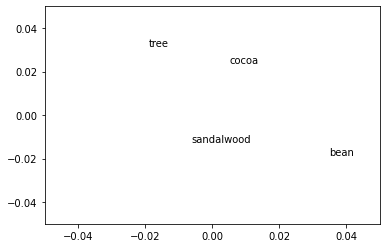

In [128]:
#u, s, vh = np.linalg.svd(W_hidden)
arr =[word_index['sandalwood'],word_index['cocoa']
      ,word_index['bean'],word_index['tree']]
for i in arr:
  plt.text(u[i,1], u[i,3], index_word[i])
  plt.axis([-0.05, 0.05, -0.05, 0.05])
  plt.savefig('/content/drive/My Drive/Colab Notebooks/test results/lr=0.0001/sim11.png', bbox_inches='tight')

In [ ]:

word_index

In [ ]:
arr = np.argsort(cs)
res = np.where(arr[word_index['coffee']]==0)
res

(array([646]),)

In [ ]:
test_target[646]

'last'

In [ ]:
arr = []
c = final_vectors['coffee']
for j,v in final_vectors.items():
  copy_final_vectors[j] = final_vectors[j]#/np.linalg.norm(final_vectors[j], ord=2, axis=0, keepdims=True)
copy_final_vectors

In [ ]:
W_hidden, W_output

In [ ]:
V, U